In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import src.models.train_model
from src.models.train_model import CustomCropToLowerXPercent

In [3]:
import torch
from typing import Union
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import math
from tqdm.notebook import tqdm
from tqdm.contrib.concurrent import process_map

In [4]:
crop_to_lower_percentage = 50
resize_size = (500, 500)
transform = transforms.Compose([
    src.models.train_model.CustomCropToLowerXPercent(crop_to_lower_percentage),
    transforms.Resize(resize_size),
    transforms.RandomHorizontalFlip(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
data_dir = "/home/trossber/street-image-classification/data/raw"
ds = src.models.train_model.StreetImageDataset(path=data_dir,         
                   #label_column="smoothness_category", 
                   #query="surface_category == 'paved'",
                   #query="smoothness_category == 'good'",
                   label_column="surface_category",
                   #transform=transform
)


# Visualisierungen

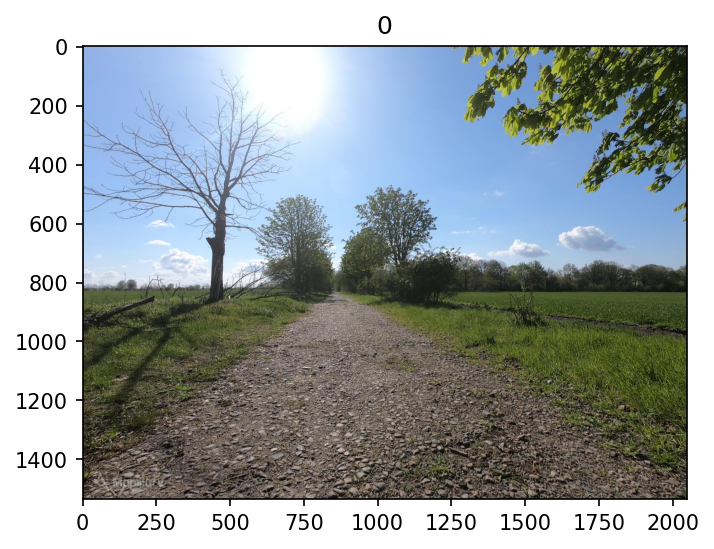

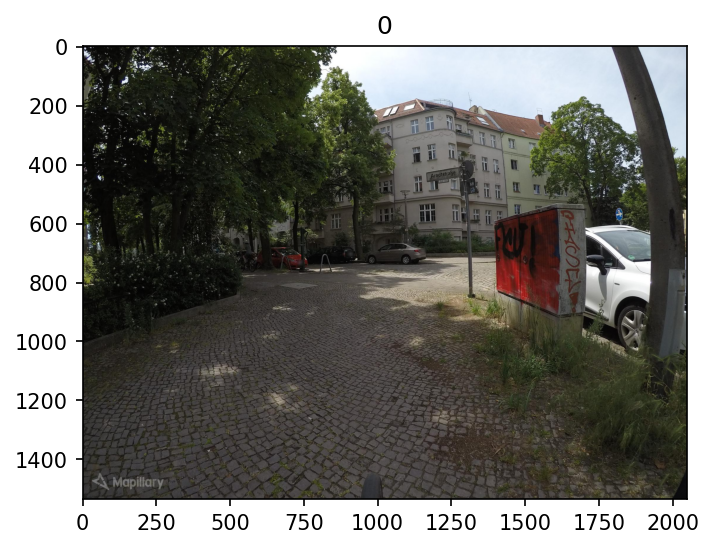

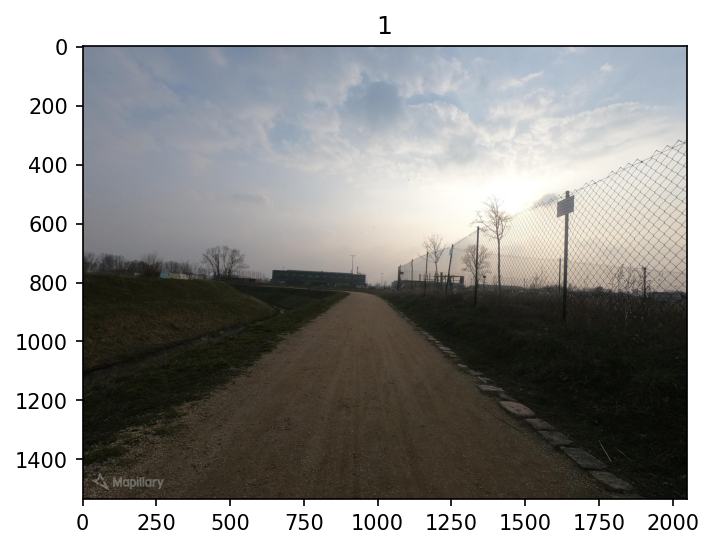

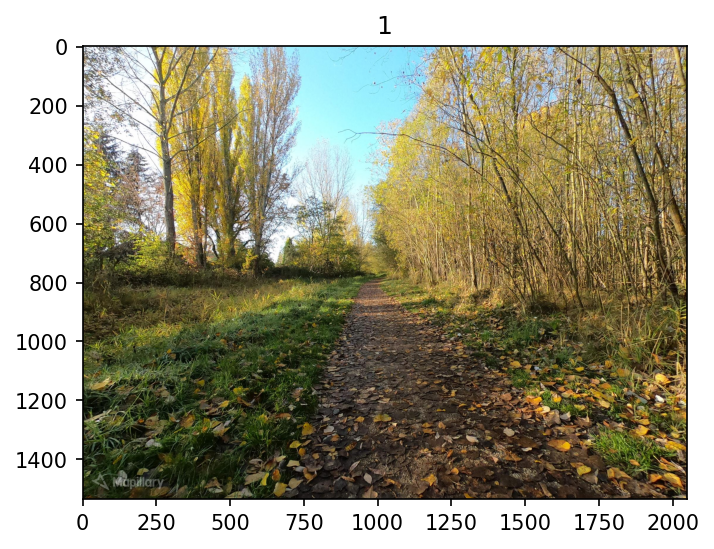

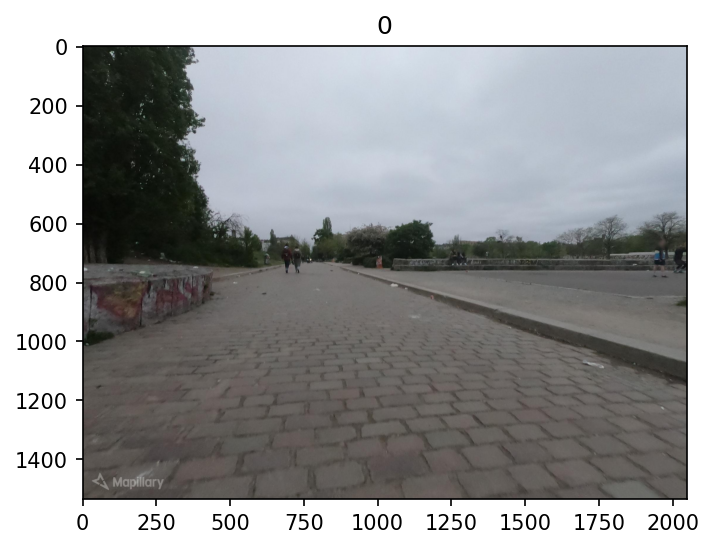

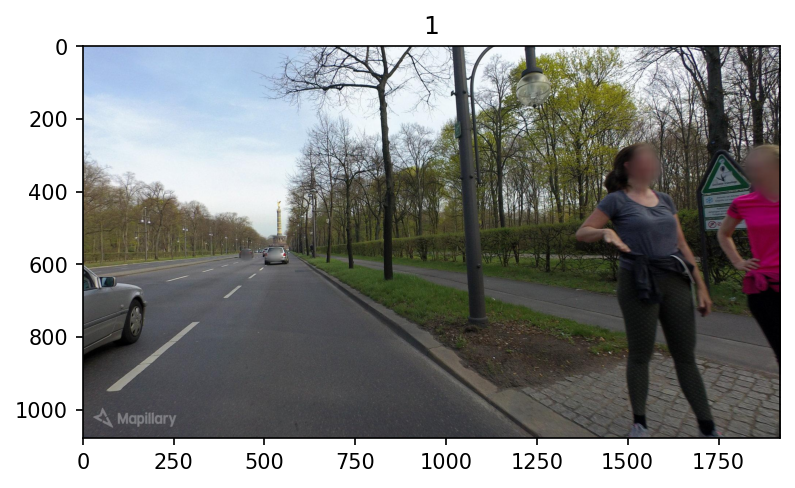

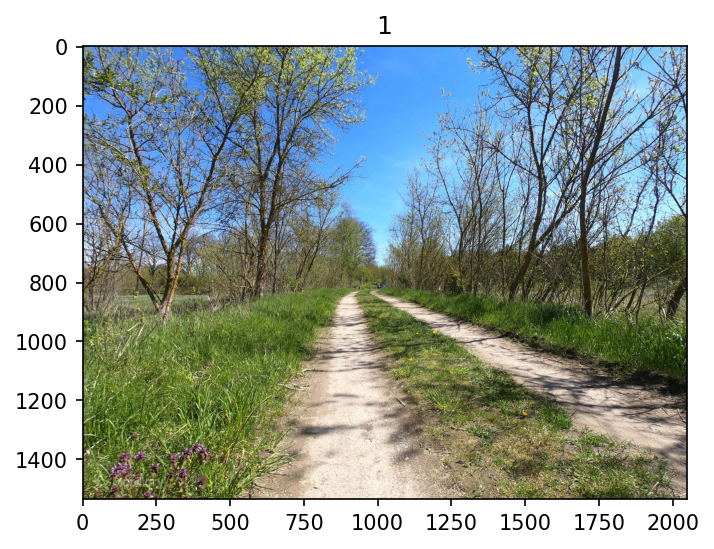

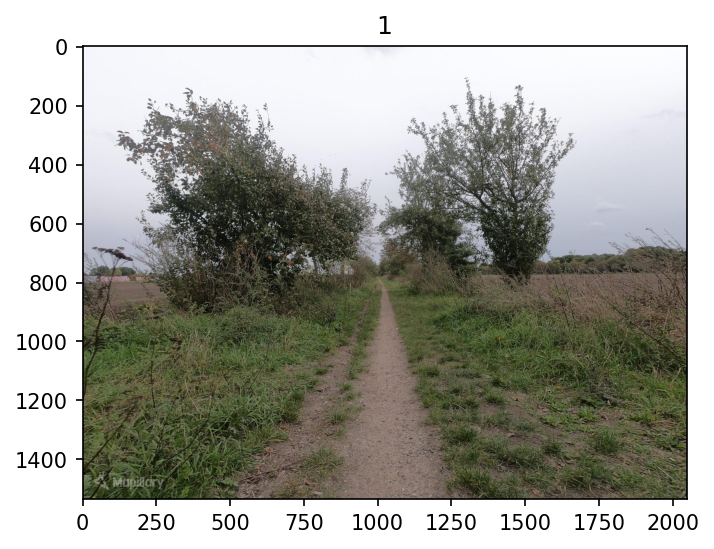

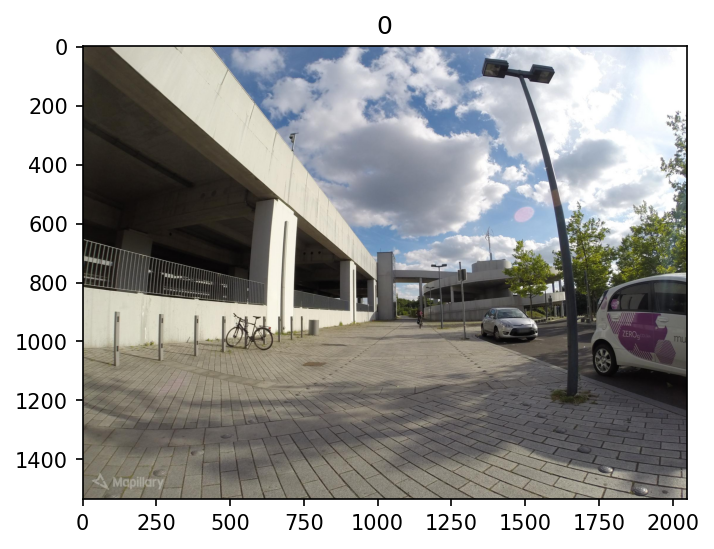

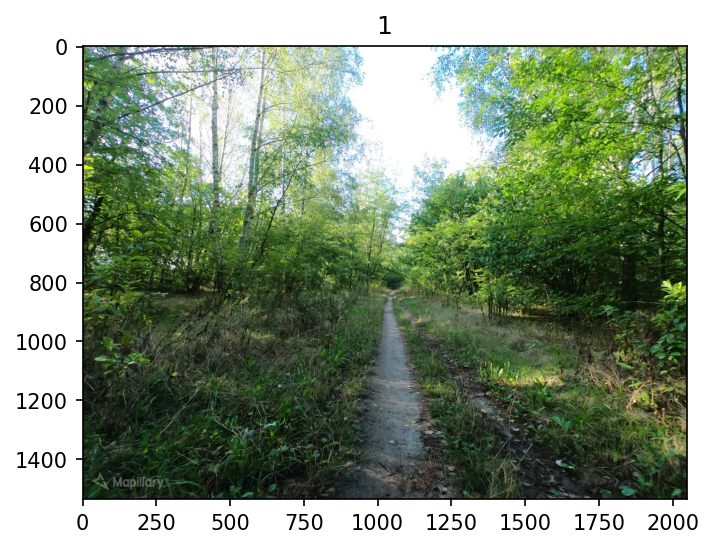

In [60]:
for elem in range(10):
    img, label = ds[elem]
    img = img.numpy().transpose((1,2,0))
    plt.figure(dpi=150)
    plt.imshow(img.astype(int))
    plt.title(label)
    plt.show()

# Verteilung der Bildgrößen

In [7]:
shapes = list()
for i in tqdm(range(len(ds))):
    shape = ds[i][0].shape
    shapes.append(shape)

  0%|          | 0/18715 [00:00<?, ?it/s]

In [15]:
shapes2 = list(map(lambda s: tuple(s)[1:], shapes))

In [19]:
counts = dict()
for s in shapes2:
    if s in counts.keys():
        counts[s] += 1
    else:
        counts[s] = 1

In [26]:
import pandas as pd

In [33]:
heights = [k[0] for k in counts.keys()]
widths =  [k[1] for k in counts.keys()]

In [56]:
df = pd.DataFrame()
df["height"] = heights
df["width"] = widths
df["count"] = counts.values()
df["ratio_float"] = df["width"] / df["height"]
df["ratio"] = df["ratio_float"].astype(str)
df["ratio"].replace(to_replace=["1.7777777777777777", "1.3333333333333333"], 
                    value=["16:9", "4:3"], 
                    inplace=True)
df.sort_values("count", ascending=False)

height  width  count  ratio_float               ratio
1     1536   2048  16959     1.333333                 4:3
2     1152   2048    926     1.777778                16:9
0     1080   1920    543     1.777778                16:9
4     1158   2048    156     1.768566   1.768566493955095
3     2048   1536     55     0.750000                0.75
5     1024   2048     38     2.000000                 2.0
7      720   1280     11     1.777778                16:9
6     1234   2048     10     1.659643   1.659643435980551
9     1529   2048      7     1.339438  1.3394375408763899
8     1151   2048      3     1.779322   1.779322328410078
10    1194   2048      3     1.715243  1.7152428810720268
11    1534   2048      3     1.335072  1.3350717079530638
12    1500   2000      1     1.333333                 4:3